In [122]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas
import numpy as np
from pandasql import sqldf

### Cargamos los datos de comunas con ñ y acentos

In [123]:
# Fixeamos el error mencionado de lectura, para tildes y ñ: utilizamos encoding = 'utf-8
territory = gpd.read_file(r'./shape/comunas.shp', encoding='utf-8')
territory

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry
0,48,170038.624165,16,8,6204,6,9.685774e+08,206184.271675,Región del Libertador Bernardo O'Higgins,Marchigüe,Cardenal Caro,"POLYGON ((-7992818.789 -4056669.319, -7992731...."
1,29,125730.104795,15,8,6102,6,4.157446e+08,151911.576827,Región del Libertador Bernardo O'Higgins,Codegua,Cachapoal,"POLYGON ((-7831651.813 -4022443.109, -7831596...."
2,30,63026.084422,15,8,6103,6,1.448565e+08,76355.326122,Región del Libertador Bernardo O'Higgins,Coinco,Cachapoal,"POLYGON ((-7892616.357 -4060673.364, -7892621...."
3,31,89840.903562,15,8,6104,6,3.256572e+08,108874.623150,Región del Libertador Bernardo O'Higgins,Coltauco,Cachapoal,"POLYGON ((-7906457.717 -4051723.734, -7906266...."
4,78,122626.493264,23,11,9121,9,6.990727e+08,156680.410681,Región de La Araucanía,Cholchol,Cautín,"POLYGON ((-8121756.186 -4645860.295, -8121644...."
...,...,...,...,...,...,...,...,...,...,...,...,...
341,255,130240.555805,19,10,16305,16,8.751006e+08,160459.137929,Región de Ñuble,San Nicolás,Punilla,"POLYGON ((-8041950.854 -4349201.562, -8041735...."
342,253,311061.932415,19,10,16304,16,2.393007e+09,388109.613857,Región de Ñuble,San Fabián,Punilla,"POLYGON ((-7931328.549 -4363544.179, -7931320...."
343,245,159257.906431,19,10,16303,16,7.638173e+08,195593.933727,Región de Ñuble,Ñiquén,Punilla,"POLYGON ((-8026032.185 -4319505.012, -8025933...."
344,243,157467.049667,19,10,16104,16,1.044405e+09,196962.664313,Región de Ñuble,El Carmen,Ñuble,"POLYGON ((-7986315.104 -4415272.935, -7986309...."


### Filtramos por código de Región 10 (Región de Los Lagos)

In [124]:
territory = territory[territory["codregion"] == 10]
territory

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry
29,133,1.828414e+05,25,13,10307,10,1.087024e+09,2.400442e+05,Región de Los Lagos,San Pablo,Osorno,"POLYGON ((-8174316.930 -4910454.843, -8174109...."
50,113,7.248812e+04,26,13,10206,10,1.761007e+08,9.842672e+04,Región de Los Lagos,Puqueldón,Chiloe,"POLYGON ((-8192405.306 -5246776.357, -8192341...."
51,120,2.626703e+05,25,13,10104,10,2.252031e+09,3.438808e+05,Región de Los Lagos,Fresia,Llanquihue,"MULTIPOLYGON (((-8226493.287 -5038106.271, -82..."
52,122,1.196095e+05,25,13,10107,10,7.650549e+08,1.663208e+05,Región de Los Lagos,Llanquihue,Llanquihue,"POLYGON ((-8161909.969 -5031493.581, -8161797...."
53,127,2.561505e+05,25,13,10301,10,1.656162e+09,3.372027e+05,Región de Los Lagos,Osorno,Osorno,"POLYGON ((-8162032.045 -4927188.771, -8161590...."
54,129,3.460363e+05,25,13,10303,10,2.544876e+09,4.600232e+05,Región de Los Lagos,Purranque,Osorno,"MULTIPOLYGON (((-8230523.146 -5021107.349, -82..."
143,130,3.071611e+05,25,13,10304,10,2.828856e+09,4.132961e+05,Región de Los Lagos,Puyehue,Osorno,"POLYGON ((-8059447.410 -4961786.325, -8057948...."
148,119,5.734616e+05,26,13,10103,10,7.058709e+09,7.852759e+05,Región de Los Lagos,Cochamó,Llanquihue,"MULTIPOLYGON (((-8080034.316 -5118383.675, -80..."
161,342,5.968358e+05,26,13,10202,10,3.214864e+09,6.697127e+05,Región de Los Lagos,Ancud,Chiloe,"MULTIPOLYGON (((-8254683.395 -5190030.921, -82..."
162,115,8.849777e+05,26,13,10208,10,6.296142e+09,1.211081e+06,Región de Los Lagos,Quellón,Chiloe,"MULTIPOLYGON (((-8331772.949 -5403679.835, -83..."


### Conservamos 'Comuna' y 'Geometry'

In [125]:
territory = territory[["Comuna", "geometry"]]
territory_2 = territory.copy() # copia que se utilizará para los datos reales
territory

,Comuna,geometry
29,San Pablo,"POLYGON ((-8174316.930 -4910454.843, -8174109...."
50,Puqueldón,"POLYGON ((-8192405.306 -5246776.357, -8192341...."
51,Fresia,"MULTIPOLYGON (((-8226493.287 -5038106.271, -82..."
52,Llanquihue,"POLYGON ((-8161909.969 -5031493.581, -8161797...."
53,Osorno,"POLYGON ((-8162032.045 -4927188.771, -8161590...."
54,Purranque,"MULTIPOLYGON (((-8230523.146 -5021107.349, -82..."
143,Puyehue,"POLYGON ((-8059447.410 -4961786.325, -8057948...."
148,Cochamó,"MULTIPOLYGON (((-8080034.316 -5118383.675, -80..."
161,Ancud,"MULTIPOLYGON (((-8254683.395 -5190030.921, -82..."
162,Quellón,"MULTIPOLYGON (((-8331772.949 -5403679.835, -83..."


### Generamos valores aleatorios para la variable 'values'

Tenemos : 30 comunas en el de dataset, de la región de Los Lagos


c:\Users\darko\Miniconda3\envs\myenv\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


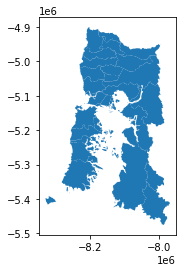

In [126]:
print(f'Tenemos : {len(territory)} comunas en el de dataset, de la región de Los Lagos')
# generamos números aleatorios para cada comuna
random_data =  np.random.randint(0, 100, len(territory));
territory["values"] = random_data
territory.plot();

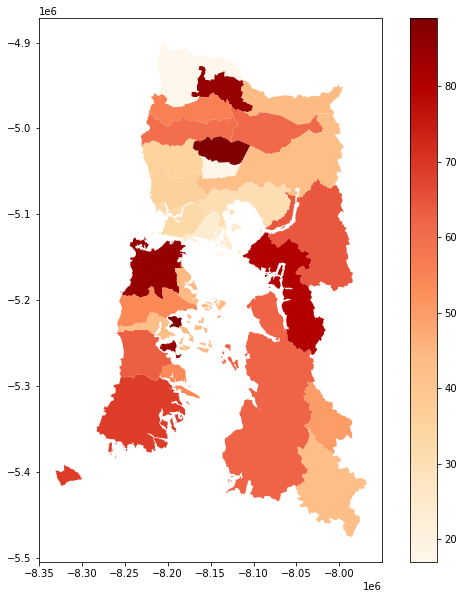

In [127]:
territory
territory.plot(column="values", legend=True, figsize=(10, 10), cmap="OrRd");

### Ahora sí, aplicamos datos reales extraídos de la tarea1
<p>Descargamos los datos previamente creados/guardados</p>

In [128]:
archivo = '../tarea1/EneroLosLagos_chile_2022-01-01_2022-01-31.csv'
df = pandas.read_csv(archivo, encoding='utf-8')
df.head(3)

,Unnamed: 0,id_news,country,media_outlet,url,title,text,date,Ancud,Calbuco,...,Puqueldón,Purranque,Puyehue,Queilén,Quellón,Quemchi,Quinchao,Río Negro,San Juan de la Costa,San Pablo
0,0,21907946.0,chile,radiosago,https://www.radiosago.cl/investigan-muerte-de-...,Investigan muerte de hombre apuñalado en Máfil...,La Fiscalía de Los Lagos dirige una investigac...,2022-01-26,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,21908053.0,chile,radiosago,https://www.radiosago.cl/ante-retroceso-a-fase...,Ante retroceso a Fase 3: Municipalidad de Puye...,Frente al alza de contagios de Covid-19 en la ...,2022-01-24,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2,21908070.0,chile,radiosago,https://www.radiosago.cl/alcaldesa-de-puyehue-...,Alcaldesa de Puyehue dio positivo por covid-19,"La jefa comunal de la comuna lacustre, María J...",2022-01-23,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Ordenamos las comunas y creamos la petición en sqldf

In [141]:
comunas= ["Puerto Montt", "Calbuco", "Cochamó", "Fresia", "Frutillar", "Los Muermos", "Llanquihue", "Maullín", "Puerto Varas", "Castro", "Ancud", "Chonchi", "Curaco de Vélez", "Dalcahue", "Puqueldón", "Queilén", "Quellón", "Quemchi", "Quinchao", "Osorno", "Puerto Octay", "Purranque", "Puyehue", "Río Negro", "San Juan de la Costa", "San Pablo", "Chaitén", "Futaleufú", "Hualaihué", "Palena"]
comunas.sort() # ordenamos alfabéticamente

petitionSQLDF  = 'SELECT '
for comuna in comunas :
    # Si encuentra un espacio entonces añade corchetes para la petición en mysql
    if comuna.find(' ') > 0 :
        petitionSQLDF = petitionSQLDF+('sum(['+comuna+']), ')
    else :
        petitionSQLDF = petitionSQLDF+('sum('+comuna+'), ')

petitionSQLDF = petitionSQLDF[:-2] # eliminamos la última coma
petitionSQLDF = petitionSQLDF+' FROM df'
petitionSQLDF

'SELECT sum(Ancud), sum(Calbuco), sum(Castro), sum(Chaitén), sum(Chonchi), sum(Cochamó), sum([Curaco de Vélez]), sum(Dalcahue), sum(Fresia), sum(Frutillar), sum(Futaleufú), sum(Hualaihué), sum(Llanquihue), sum([Los Muermos]), sum(Maullín), sum(Osorno), sum(Palena), sum([Puerto Montt]), sum([Puerto Octay]), sum([Puerto Varas]), sum(Puqueldón), sum(Purranque), sum(Puyehue), sum(Queilén), sum(Quellón), sum(Quemchi), sum(Quinchao), sum([Río Negro]), sum([San Juan de la Costa]), sum([San Pablo]) FROM df'

### Filtramos por cantidad de menciones totales 

In [142]:
result = sqldf(petitionSQLDF)
result

,sum(Ancud),sum(Calbuco),sum(Castro),sum(Chaitén),sum(Chonchi),sum(Cochamó),sum([Curaco de Vélez]),sum(Dalcahue),sum(Fresia),sum(Frutillar),...,sum(Puqueldón),sum(Purranque),sum(Puyehue),sum(Queilén),sum(Quellón),sum(Quemchi),sum(Quinchao),sum([Río Negro]),sum([San Juan de la Costa]),sum([San Pablo])
0,148.0,105.0,346.0,60.0,37.0,52.0,37.0,62.0,65.0,116.0,...,12.0,55.0,50.0,2.0,77.0,31.0,64.0,29.0,18.0,24.0


### Nota importante: Como la consulta se hizo de manera alfabética, hay que ordenar territory_2

In [130]:
# Obtenemos 'result' como un array
values = result.values[0] # esto contiene los valores de sumas de cada comuna

In [170]:
# Añadimos los datos filtrados anteriormente
territory_2 = territory_2.sort_values(by=['Comuna']) # ordenamos alfabéticamente
territory_2['values'] = values # añadimos los valores de sumas de cada comuna

# Creamos coords de referencia
# https://stackoverflow.com/questions/38899190/geopandas-label-polygons
territory_2['coords'] = territory_2['geometry'].apply(lambda x: x.representative_point().coords[:])
territory_2['coords'] = [coords[0] for coords in territory_2['coords']]
territory_2.head(3)

,Comuna,geometry,values,coords
161,Ancud,"MULTIPOLYGON (((-8254683.395 -5190030.921, -82...",148.0,"(-8216686.860888084, -5162692.993100001)"
254,Calbuco,"MULTIPOLYGON (((-8112967.653 -5147692.027, -81...",346.0,"(-8148106.117221469, -5115110.540750001)"
167,Castro,"MULTIPOLYGON (((-8171095.068 -5254002.891, -81...",37.0,"(-8227801.498338105, -5230294.630800001)"


,Comuna,geometry,values,coords
161,Ancud,"MULTIPOLYGON (((-8254683.395 -5190030.921, -82...",148.0,"(-8216686.860888084, -5162692.993100001)"
254,Calbuco,"MULTIPOLYGON (((-8112967.653 -5147692.027, -81...",346.0,"(-8148106.117221469, -5115110.540750001)"
167,Castro,"MULTIPOLYGON (((-8171095.068 -5254002.891, -81...",37.0,"(-8227801.498338105, -5230294.630800001)"


### Con los datos listos, podemos graficar

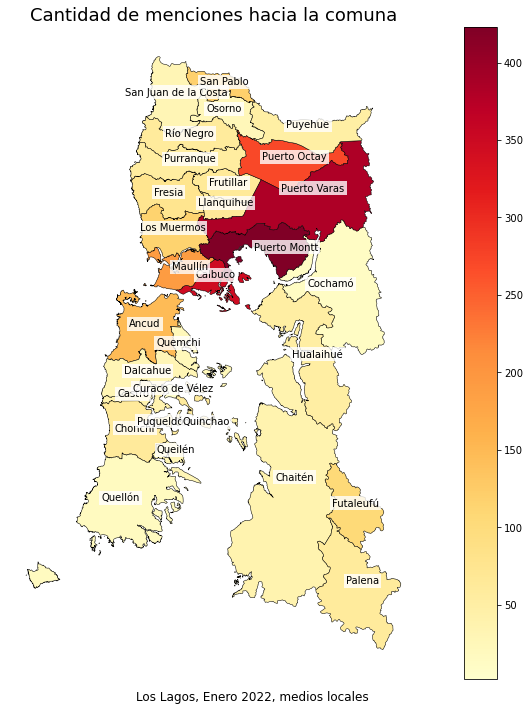

In [186]:
# Graficamos los datos
territory_2.plot(column="values", legend=True, figsize=(16, 12), cmap="YlOrRd", edgecolor="black", linewidth=0.5).set_axis_off();
# Información
plt.title("Cantidad de menciones hacia la comuna", fontsize=18);

for idx, row in territory_2.iterrows():
    plt.text(row.coords[0], row.coords[1], s=row['Comuna'], horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

plt.text(0.6, 0.1, "Los Lagos, Enero 2022, medios locales", fontsize=12, ha='center', transform=plt.gcf().transFigure);